In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)



/anaconda3/envs/tf-cpu/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


   8192/2110848 [..............................] - ETA: 26s

  24576/2110848 [..............................] - ETA: 22s

  40960/2110848 [..............................] - ETA: 17s

  57344/2110848 [..............................] - ETA: 16s

  73728/2110848 [>.............................] - ETA: 15s

  90112/2110848 [>.............................] - ETA: 15s

 106496/2110848 [>.............................] - ETA: 14s

 122880/2110848 [>.............................] - ETA: 13s

 139264/2110848 [>.............................] - ETA: 13s

 163840/2110848 [=>............................] - ETA: 12s

 196608/2110848 [=>............................] - ETA: 11s

 212992/2110848 [==>...........................] - ETA: 11s

 229376/2110848 [==>...........................] - ETA: 10s

 245760/2110848 [==>...........................] - ETA: 10s

 278528/2110848 [==>...........................] - ETA: 9s 

 303104/2110848 [===>..........................] - ETA: 9s

 319488/2110848 [===>..........................] - ETA: 9s

 352256/2110848 [====>.........................] - ETA: 8s

 368640/2110848 [====>.........................] - ETA: 8s

 401408/2110848 [====>.........................] - ETA: 8s

 417792/2110848 [====>.........................] - ETA: 8s

 442368/2110848 [=====>........................] - ETA: 7s

 475136/2110848 [=====>........................] - ETA: 7s

 507904/2110848 [======>.......................] - ETA: 7s

 524288/2110848 [======>.......................] - ETA: 6s

 557056/2110848 [======>.......................] - ETA: 6s

 598016/2110848 [=======>......................] - ETA: 6s

 630784/2110848 [=======>......................] - ETA: 5s

 647168/2110848 [========>.....................] - ETA: 5s

 679936/2110848 [========>.....................] - ETA: 5s

 720896/2110848 [=========>....................] - ETA: 5s

 753664/2110848 [=========>....................] - ETA: 5s

 786432/2110848 [==========>...................] - ETA: 5s

 819200/2110848 [==========>...................] - ETA: 4s

 835584/2110848 [==========>...................] - ETA: 4s

 876544/2110848 [===========>..................] - ETA: 4s

 925696/2110848 [============>.................] - ETA: 4s

 958464/2110848 [============>.................] - ETA: 4s

 999424/2110848 [=============>................] - ETA: 3s

1032192/2110848 [=============>................] - ETA: 3s

1064960/2110848 [==============>...............] - ETA: 3s

1097728/2110848 [==============>...............] - ETA: 3s

1138688/2110848 [===============>..............] - ETA: 3s

1171456/2110848 [===============>..............] - ETA: 3s

1204224/2110848 [================>.............] - ETA: 3s

1236992/2110848 [================>.............] - ETA: 2s

1277952/2110848 [=================>............] - ETA: 2s

1327104/2110848 [=================>............] - ETA: 2s

1359872/2110848 [==================>...........] - ETA: 2s

1392640/2110848 [==================>...........] - ETA: 2s

1433600/2110848 [===================>..........] - ETA: 2s

1482752/2110848 [====================>.........] - ETA: 1s

1531904/2110848 [====================>.........] - ETA: 1s

1572864/2110848 [=====================>........] - ETA: 1s

1622016/2110848 [======================>.......] - ETA: 1s

1671168/2110848 [======================>.......] - ETA: 1s

1728512/2110848 [=======================>......] - ETA: 1s

1777664/2110848 [========================>.....] - ETA: 0s

1810432/2110848 [========================>.....] - ETA: 0s

1867776/2110848 [=========================>....] - ETA: 0s

1900544/2110848 [==========================>...] - ETA: 0s

1949696/2110848 [==========================>...] - ETA: 0s

2007040/2110848 [===========================>..] - ETA: 0s

2056192/2110848 [============================>.] - ETA: 0s

2113536/2110848 [==============================] - 6s 3us/step


In [8]:
len(train_labels)

8982

In [12]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

train_labels[10]

3

In [22]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [24]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [26]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Instructions for updating:
Use tf.cast instead.


Train on 7982 samples, validate on 1000 samples
Epoch 1/20


 512/7982 [>.............................] - ETA: 7s - loss: 3.8232 - acc: 0.0352

1024/7982 [==>...........................] - ETA: 4s - loss: 3.7484 - acc: 0.2080

1536/7982 [====>.........................] - ETA: 3s - loss: 3.6566 - acc: 0.3079

2048/7982 [======>.......................] - ETA: 2s - loss: 3.5722 - acc: 0.3486

2560/7982 [========>.....................] - ETA: 2s - loss: 3.4735 - acc: 0.3891

3072/7982 [==========>...................] - ETA: 1s - loss: 3.3832 - acc: 0.4111

3584/7982 [============>.................] - ETA: 1s - loss: 3.2835 - acc: 0.4322

4096/7982 [==============>...............] - ETA: 1s - loss: 3.1905 - acc: 0.4478

4608/7982 [================>.............] - ETA: 0s - loss: 3.0884 - acc: 0.4635

5120/7982 [==================>...........] - ETA: 0s - loss: 2.9977 - acc: 0.4762

5632/7982 [====================>.........] - ETA: 0s - loss: 2.9246 - acc: 0.4840

6144/7982 [======================>.......] - ETA: 0s - loss: 2.8468 - acc: 0.4963

6656/7982 [========================>.....] - ETA: 0s - loss: 2.7694 - acc: 0.5077

7168/7982 [=========================>....] - ETA: 0s - loss: 2.7072 - acc: 0.5158

7680/7982 [===========================>..] - ETA: 0s - loss: 2.6481 - acc: 0.5234

7982/7982 [==============================] - 2s 281us/step - loss: 2.6102 - acc: 0.5287 - val_loss: 1.6778 - val_acc: 0.6340


Epoch 2/20
 512/7982 [>.............................] - ETA: 1s - loss: 1.5394 - acc: 0.6895

1024/7982 [==>...........................] - ETA: 1s - loss: 1.5969 - acc: 0.6680

1536/7982 [====>.........................] - ETA: 1s - loss: 1.5918 - acc: 0.6686

2048/7982 [======>.......................] - ETA: 0s - loss: 1.5570 - acc: 0.6753

2560/7982 [========>.....................] - ETA: 0s - loss: 1.5376 - acc: 0.6781

3072/7982 [==========>...................] - ETA: 0s - loss: 1.4981 - acc: 0.6875

3584/7982 [============>.................] - ETA: 0s - loss: 1.4929 - acc: 0.6875

4096/7982 [==============>...............] - ETA: 0s - loss: 1.4712 - acc: 0.6919

4608/7982 [================>.............] - ETA: 0s - loss: 1.4535 - acc: 0.6973

5120/7982 [==================>...........] - ETA: 0s - loss: 1.4419 - acc: 0.6977

5632/7982 [====================>.........] - ETA: 0s - loss: 1.4178 - acc: 0.7024

6144/7982 [======================>.......] - ETA: 0s - loss: 1.4109 - acc: 0.7030

6656/7982 [========================>.....] - ETA: 0s - loss: 1.4082 - acc: 0.7018

7168/7982 [=========================>....] - ETA: 0s - loss: 1.4009 - acc: 0.7044

7680/7982 [===========================>..] - ETA: 0s - loss: 1.4027 - acc: 0.7036

7982/7982 [==============================] - 1s 151us/step - loss: 1.3994 - acc: 0.7035 - val_loss: 1.2831 - val_acc: 0.7150


Epoch 3/20


 512/7982 [>.............................] - ETA: 1s - loss: 1.1882 - acc: 0.7441

1024/7982 [==>...........................] - ETA: 1s - loss: 1.1573 - acc: 0.7461

1536/7982 [====>.........................] - ETA: 0s - loss: 1.1498 - acc: 0.7474

2048/7982 [======>.......................] - ETA: 0s - loss: 1.1240 - acc: 0.7539

2560/7982 [========>.....................] - ETA: 0s - loss: 1.1238 - acc: 0.7582

3072/7982 [==========>...................] - ETA: 0s - loss: 1.1175 - acc: 0.7559

3584/7982 [============>.................] - ETA: 0s - loss: 1.1042 - acc: 0.7564

4096/7982 [==============>...............] - ETA: 0s - loss: 1.0960 - acc: 0.7568

4608/7982 [================>.............] - ETA: 0s - loss: 1.1027 - acc: 0.7548

5120/7982 [==================>...........] - ETA: 0s - loss: 1.0953 - acc: 0.7566

5632/7982 [====================>.........] - ETA: 0s - loss: 1.0963 - acc: 0.7583

6144/7982 [======================>.......] - ETA: 0s - loss: 1.0905 - acc: 0.7601

6656/7982 [========================>.....] - ETA: 0s - loss: 1.0908 - acc: 0.7602

7168/7982 [=========================>....] - ETA: 0s - loss: 1.0769 - acc: 0.7635

7680/7982 [===========================>..] - ETA: 0s - loss: 1.0604 - acc: 0.7668

7982/7982 [==============================] - 1s 152us/step - loss: 1.0562 - acc: 0.7676 - val_loss: 1.1193 - val_acc: 0.7550


Epoch 4/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.9086 - acc: 0.8027

1024/7982 [==>...........................] - ETA: 1s - loss: 0.8335 - acc: 0.8271

1536/7982 [====>.........................] - ETA: 0s - loss: 0.8799 - acc: 0.8145

2048/7982 [======>.......................] - ETA: 0s - loss: 0.8764 - acc: 0.8174

2560/7982 [========>.....................] - ETA: 0s - loss: 0.8771 - acc: 0.8160

3072/7982 [==========>...................] - ETA: 0s - loss: 0.8733 - acc: 0.8164

3584/7982 [============>.................] - ETA: 0s - loss: 0.8775 - acc: 0.8147

4096/7982 [==============>...............] - ETA: 0s - loss: 0.8649 - acc: 0.8169

4608/7982 [================>.............] - ETA: 0s - loss: 0.8536 - acc: 0.8197

5120/7982 [==================>...........] - ETA: 0s - loss: 0.8527 - acc: 0.8184

5632/7982 [====================>.........] - ETA: 0s - loss: 0.8485 - acc: 0.8194

6144/7982 [======================>.......] - ETA: 0s - loss: 0.8418 - acc: 0.8201

6656/7982 [========================>.....] - ETA: 0s - loss: 0.8449 - acc: 0.8190

7168/7982 [=========================>....] - ETA: 0s - loss: 0.8358 - acc: 0.8205

7680/7982 [===========================>..] - ETA: 0s - loss: 0.8322 - acc: 0.8208

7982/7982 [==============================] - 1s 148us/step - loss: 0.8303 - acc: 0.8211 - val_loss: 1.0192 - val_acc: 0.7890


Epoch 5/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.7042 - acc: 0.8496

1024/7982 [==>...........................] - ETA: 1s - loss: 0.6794 - acc: 0.8633

1536/7982 [====>.........................] - ETA: 0s - loss: 0.6788 - acc: 0.8646

2048/7982 [======>.......................] - ETA: 0s - loss: 0.6743 - acc: 0.8613

2560/7982 [========>.....................] - ETA: 0s - loss: 0.6846 - acc: 0.8621

3072/7982 [==========>...................] - ETA: 0s - loss: 0.6835 - acc: 0.8636

3584/7982 [============>.................] - ETA: 0s - loss: 0.6965 - acc: 0.8591

4096/7982 [==============>...............] - ETA: 0s - loss: 0.6912 - acc: 0.8594

4608/7982 [================>.............] - ETA: 0s - loss: 0.6883 - acc: 0.8589

5120/7982 [==================>...........] - ETA: 0s - loss: 0.6819 - acc: 0.8605

5632/7982 [====================>.........] - ETA: 0s - loss: 0.6802 - acc: 0.8594

6144/7982 [======================>.......] - ETA: 0s - loss: 0.6777 - acc: 0.8600

6656/7982 [========================>.....] - ETA: 0s - loss: 0.6716 - acc: 0.8600

7168/7982 [=========================>....] - ETA: 0s - loss: 0.6682 - acc: 0.8601

7680/7982 [===========================>..] - ETA: 0s - loss: 0.6681 - acc: 0.8596

7982/7982 [==============================] - 1s 150us/step - loss: 0.6645 - acc: 0.8602 - val_loss: 0.9665 - val_acc: 0.8000


Epoch 6/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.5480 - acc: 0.8867

1024/7982 [==>...........................] - ETA: 1s - loss: 0.5354 - acc: 0.8945

1536/7982 [====>.........................] - ETA: 0s - loss: 0.5257 - acc: 0.8913

2048/7982 [======>.......................] - ETA: 0s - loss: 0.5293 - acc: 0.8896

2560/7982 [========>.....................] - ETA: 0s - loss: 0.5319 - acc: 0.8918

3072/7982 [==========>...................] - ETA: 0s - loss: 0.5326 - acc: 0.8910

3584/7982 [============>.................] - ETA: 0s - loss: 0.5200 - acc: 0.8934

4096/7982 [==============>...............] - ETA: 0s - loss: 0.5098 - acc: 0.8953

4608/7982 [================>.............] - ETA: 0s - loss: 0.5173 - acc: 0.8930

5120/7982 [==================>...........] - ETA: 0s - loss: 0.5139 - acc: 0.8947

5632/7982 [====================>.........] - ETA: 0s - loss: 0.5180 - acc: 0.8933

6144/7982 [======================>.......] - ETA: 0s - loss: 0.5163 - acc: 0.8942

6656/7982 [========================>.....] - ETA: 0s - loss: 0.5223 - acc: 0.8926

7168/7982 [=========================>....] - ETA: 0s - loss: 0.5319 - acc: 0.8906

7680/7982 [===========================>..] - ETA: 0s - loss: 0.5300 - acc: 0.8914

7982/7982 [==============================] - 1s 145us/step - loss: 0.5311 - acc: 0.8916 - val_loss: 0.9177 - val_acc: 0.8150


Epoch 7/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.3713 - acc: 0.9355

1024/7982 [==>...........................] - ETA: 1s - loss: 0.3492 - acc: 0.9404

1536/7982 [====>.........................] - ETA: 0s - loss: 0.3784 - acc: 0.9310

2048/7982 [======>.......................] - ETA: 0s - loss: 0.3867 - acc: 0.9277

2560/7982 [========>.....................] - ETA: 0s - loss: 0.4026 - acc: 0.9207

3072/7982 [==========>...................] - ETA: 0s - loss: 0.4126 - acc: 0.9167

3584/7982 [============>.................] - ETA: 0s - loss: 0.4134 - acc: 0.9177

4096/7982 [==============>...............] - ETA: 0s - loss: 0.4187 - acc: 0.9160

4608/7982 [================>.............] - ETA: 0s - loss: 0.4266 - acc: 0.9125

5120/7982 [==================>...........] - ETA: 0s - loss: 0.4297 - acc: 0.9117

5632/7982 [====================>.........] - ETA: 0s - loss: 0.4211 - acc: 0.9125

6144/7982 [======================>.......] - ETA: 0s - loss: 0.4173 - acc: 0.9134

6656/7982 [========================>.....] - ETA: 0s - loss: 0.4225 - acc: 0.9117

7168/7982 [=========================>....] - ETA: 0s - loss: 0.4211 - acc: 0.9122

7680/7982 [===========================>..] - ETA: 0s - loss: 0.4292 - acc: 0.9115

7982/7982 [==============================] - 1s 141us/step - loss: 0.4298 - acc: 0.9107 - val_loss: 0.9171 - val_acc: 0.8100


Epoch 8/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.3836 - acc: 0.9297

1024/7982 [==>...........................] - ETA: 1s - loss: 0.3792 - acc: 0.9238

1536/7982 [====>.........................] - ETA: 0s - loss: 0.3590 - acc: 0.9271

2048/7982 [======>.......................] - ETA: 0s - loss: 0.3605 - acc: 0.9243

2560/7982 [========>.....................] - ETA: 0s - loss: 0.3570 - acc: 0.9270

3072/7982 [==========>...................] - ETA: 0s - loss: 0.3625 - acc: 0.9225

3584/7982 [============>.................] - ETA: 0s - loss: 0.3551 - acc: 0.9230

4096/7982 [==============>...............] - ETA: 0s - loss: 0.3514 - acc: 0.9241

4608/7982 [================>.............] - ETA: 0s - loss: 0.3523 - acc: 0.9245

5120/7982 [==================>...........] - ETA: 0s - loss: 0.3460 - acc: 0.9264

5632/7982 [====================>.........] - ETA: 0s - loss: 0.3472 - acc: 0.9265

6144/7982 [======================>.......] - ETA: 0s - loss: 0.3471 - acc: 0.9268

6656/7982 [========================>.....] - ETA: 0s - loss: 0.3457 - acc: 0.9265

7168/7982 [=========================>....] - ETA: 0s - loss: 0.3452 - acc: 0.9258

7680/7982 [===========================>..] - ETA: 0s - loss: 0.3447 - acc: 0.9262

7982/7982 [==============================] - 1s 148us/step - loss: 0.3475 - acc: 0.9255 - val_loss: 0.9157 - val_acc: 0.8080


Epoch 9/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.2928 - acc: 0.9453

1024/7982 [==>...........................] - ETA: 1s - loss: 0.3214 - acc: 0.9326

1536/7982 [====>.........................] - ETA: 0s - loss: 0.3010 - acc: 0.9362

2048/7982 [======>.......................] - ETA: 0s - loss: 0.2983 - acc: 0.9380

2560/7982 [========>.....................] - ETA: 0s - loss: 0.2898 - acc: 0.9406

3072/7982 [==========>...................] - ETA: 0s - loss: 0.2828 - acc: 0.9434

3584/7982 [============>.................] - ETA: 0s - loss: 0.2870 - acc: 0.9408

4096/7982 [==============>...............] - ETA: 0s - loss: 0.2916 - acc: 0.9395

4608/7982 [================>.............] - ETA: 0s - loss: 0.2908 - acc: 0.9397

5120/7982 [==================>...........] - ETA: 0s - loss: 0.2870 - acc: 0.9406

5632/7982 [====================>.........] - ETA: 0s - loss: 0.2854 - acc: 0.9405

6144/7982 [======================>.......] - ETA: 0s - loss: 0.2833 - acc: 0.9406

6656/7982 [========================>.....] - ETA: 0s - loss: 0.2832 - acc: 0.9398

7168/7982 [=========================>....] - ETA: 0s - loss: 0.2854 - acc: 0.9385

7680/7982 [===========================>..] - ETA: 0s - loss: 0.2907 - acc: 0.9366

7982/7982 [==============================] - 1s 145us/step - loss: 0.2905 - acc: 0.9366 - val_loss: 0.9082 - val_acc: 0.8160


Epoch 10/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.2403 - acc: 0.9551

1024/7982 [==>...........................] - ETA: 1s - loss: 0.2393 - acc: 0.9443

1536/7982 [====>.........................] - ETA: 0s - loss: 0.2324 - acc: 0.9505

2048/7982 [======>.......................] - ETA: 0s - loss: 0.2333 - acc: 0.9487

2560/7982 [========>.....................] - ETA: 0s - loss: 0.2350 - acc: 0.9477

3072/7982 [==========>...................] - ETA: 0s - loss: 0.2304 - acc: 0.9486

3584/7982 [============>.................] - ETA: 0s - loss: 0.2349 - acc: 0.9478

4096/7982 [==============>...............] - ETA: 0s - loss: 0.2364 - acc: 0.9460

4608/7982 [================>.............] - ETA: 0s - loss: 0.2375 - acc: 0.9462

5120/7982 [==================>...........] - ETA: 0s - loss: 0.2379 - acc: 0.9453

5632/7982 [====================>.........] - ETA: 0s - loss: 0.2396 - acc: 0.9460

6144/7982 [======================>.......] - ETA: 0s - loss: 0.2427 - acc: 0.9448

6656/7982 [========================>.....] - ETA: 0s - loss: 0.2447 - acc: 0.9446

7168/7982 [=========================>....] - ETA: 0s - loss: 0.2434 - acc: 0.9450

7680/7982 [===========================>..] - ETA: 0s - loss: 0.2428 - acc: 0.9448

7982/7982 [==============================] - 1s 141us/step - loss: 0.2432 - acc: 0.9446 - val_loss: 0.8956 - val_acc: 0.8240


Epoch 11/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.2170 - acc: 0.9512

1024/7982 [==>...........................] - ETA: 0s - loss: 0.2013 - acc: 0.9531

1536/7982 [====>.........................] - ETA: 0s - loss: 0.2060 - acc: 0.9512

2048/7982 [======>.......................] - ETA: 0s - loss: 0.2041 - acc: 0.9546

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1996 - acc: 0.9563

3072/7982 [==========>...................] - ETA: 0s - loss: 0.2019 - acc: 0.9554

3584/7982 [============>.................] - ETA: 0s - loss: 0.2015 - acc: 0.9548

4096/7982 [==============>...............] - ETA: 0s - loss: 0.2000 - acc: 0.9548

4608/7982 [================>.............] - ETA: 0s - loss: 0.2004 - acc: 0.9533

5120/7982 [==================>...........] - ETA: 0s - loss: 0.2081 - acc: 0.9520

5632/7982 [====================>.........] - ETA: 0s - loss: 0.2025 - acc: 0.9538

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1978 - acc: 0.9551

6656/7982 [========================>.....] - ETA: 0s - loss: 0.2013 - acc: 0.9536

7168/7982 [=========================>....] - ETA: 0s - loss: 0.2056 - acc: 0.9526

7680/7982 [===========================>..] - ETA: 0s - loss: 0.2086 - acc: 0.9508

7982/7982 [==============================] - 1s 141us/step - loss: 0.2108 - acc: 0.9498 - val_loss: 0.9022 - val_acc: 0.8070


Epoch 12/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1507 - acc: 0.9590

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1493 - acc: 0.9648

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1532 - acc: 0.9629

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1585 - acc: 0.9609

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1652 - acc: 0.9578

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1742 - acc: 0.9548

3584/7982 [============>.................] - ETA: 0s - loss: 0.1704 - acc: 0.9559

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1718 - acc: 0.9563

4608/7982 [================>.............] - ETA: 0s - loss: 0.1724 - acc: 0.9570

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1736 - acc: 0.9561

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1755 - acc: 0.9542

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1780 - acc: 0.9535

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1798 - acc: 0.9536

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1819 - acc: 0.9533

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1839 - acc: 0.9525

7982/7982 [==============================] - 1s 141us/step - loss: 0.1838 - acc: 0.9523 - val_loss: 0.9147 - val_acc: 0.8090


Epoch 13/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1595 - acc: 0.9531

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1539 - acc: 0.9561

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1427 - acc: 0.9590

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1467 - acc: 0.9580

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1560 - acc: 0.9559

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1524 - acc: 0.9567

3584/7982 [============>.................] - ETA: 0s - loss: 0.1530 - acc: 0.9554

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1576 - acc: 0.9536

4608/7982 [================>.............] - ETA: 0s - loss: 0.1586 - acc: 0.9540

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1626 - acc: 0.9539

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1599 - acc: 0.9542

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1633 - acc: 0.9538

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1669 - acc: 0.9528

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1683 - acc: 0.9517

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1689 - acc: 0.9517

7982/7982 [==============================] - 1s 140us/step - loss: 0.1690 - acc: 0.9518 - val_loss: 0.9535 - val_acc: 0.8070


Epoch 14/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1243 - acc: 0.9688

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1257 - acc: 0.9727

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1310 - acc: 0.9688

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1287 - acc: 0.9683

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1343 - acc: 0.9664

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1366 - acc: 0.9645

3584/7982 [============>.................] - ETA: 0s - loss: 0.1416 - acc: 0.9615

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1425 - acc: 0.9600

4608/7982 [================>.............] - ETA: 0s - loss: 0.1441 - acc: 0.9588

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1445 - acc: 0.9590

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1456 - acc: 0.9576

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1443 - acc: 0.9578

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1508 - acc: 0.9554

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1500 - acc: 0.9561

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1528 - acc: 0.9546

7982/7982 [==============================] - 1s 141us/step - loss: 0.1540 - acc: 0.9540 - val_loss: 0.9422 - val_acc: 0.8130


Epoch 15/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1219 - acc: 0.9688

1024/7982 [==>...........................] - ETA: 1s - loss: 0.1267 - acc: 0.9619

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1305 - acc: 0.9583

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1362 - acc: 0.9575

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1391 - acc: 0.9566

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1374 - acc: 0.9583

3584/7982 [============>.................] - ETA: 0s - loss: 0.1426 - acc: 0.9565

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1378 - acc: 0.9573

4608/7982 [================>.............] - ETA: 0s - loss: 0.1349 - acc: 0.9579

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1366 - acc: 0.9568

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1393 - acc: 0.9563

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1384 - acc: 0.9556

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1413 - acc: 0.9548

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1419 - acc: 0.9545

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1438 - acc: 0.9536

7982/7982 [==============================] - 1s 142us/step - loss: 0.1441 - acc: 0.9535 - val_loss: 0.9809 - val_acc: 0.8100


Epoch 16/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1133 - acc: 0.9668

1024/7982 [==>...........................] - ETA: 1s - loss: 0.1080 - acc: 0.9678

1536/7982 [====>.........................] - ETA: 1s - loss: 0.1084 - acc: 0.9661

2048/7982 [======>.......................] - ETA: 1s - loss: 0.1048 - acc: 0.9678

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1049 - acc: 0.9668

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1114 - acc: 0.9661

3584/7982 [============>.................] - ETA: 0s - loss: 0.1159 - acc: 0.9634

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1184 - acc: 0.9636

4608/7982 [================>.............] - ETA: 0s - loss: 0.1164 - acc: 0.9633

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1202 - acc: 0.9623

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1223 - acc: 0.9615

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1239 - acc: 0.9609

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1264 - acc: 0.9599



7168/7982 [=========================>....] - ETA: 0s - loss: 0.1257 - acc: 0.9597

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1272 - acc: 0.9590

7982/7982 [==============================] - 1s 168us/step - loss: 0.1313 - acc: 0.9574 - val_loss: 0.9611 - val_acc: 0.8150


Epoch 17/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1031 - acc: 0.9668

1024/7982 [==>...........................] - ETA: 1s - loss: 0.1087 - acc: 0.9648

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1063 - acc: 0.9635

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1127 - acc: 0.9619

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1073 - acc: 0.9629

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1075 - acc: 0.9629

3584/7982 [============>.................] - ETA: 0s - loss: 0.1055 - acc: 0.9626

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1108 - acc: 0.9607

4608/7982 [================>.............] - ETA: 0s - loss: 0.1085 - acc: 0.9614

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1109 - acc: 0.9600

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1146 - acc: 0.9586

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1147 - acc: 0.9595

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1162 - acc: 0.9585

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1197 - acc: 0.9581

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1217 - acc: 0.9578

7982/7982 [==============================] - 1s 152us/step - loss: 0.1215 - acc: 0.9579 - val_loss: 1.0227 - val_acc: 0.8110


Epoch 18/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.0979 - acc: 0.9668

1024/7982 [==>...........................] - ETA: 1s - loss: 0.1128 - acc: 0.9648

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1091 - acc: 0.9648

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1104 - acc: 0.9648

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1107 - acc: 0.9629

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1100 - acc: 0.9626

3584/7982 [============>.................] - ETA: 0s - loss: 0.1128 - acc: 0.9618

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1177 - acc: 0.9592

4608/7982 [================>.............] - ETA: 0s - loss: 0.1174 - acc: 0.9599

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1174 - acc: 0.9596

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1177 - acc: 0.9592

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1186 - acc: 0.9588

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1211 - acc: 0.9576

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1205 - acc: 0.9577

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1215 - acc: 0.9569

7982/7982 [==============================] - 1s 157us/step - loss: 0.1228 - acc: 0.9564 - val_loss: 1.0146 - val_acc: 0.8020


Epoch 19/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.0509 - acc: 0.9824

1024/7982 [==>...........................] - ETA: 1s - loss: 0.0647 - acc: 0.9746

1536/7982 [====>.........................] - ETA: 1s - loss: 0.0698 - acc: 0.9727

2048/7982 [======>.......................] - ETA: 0s - loss: 0.0786 - acc: 0.9678

2560/7982 [========>.....................] - ETA: 0s - loss: 0.0824 - acc: 0.9660

3072/7982 [==========>...................] - ETA: 0s - loss: 0.0887 - acc: 0.9622

3584/7982 [============>.................] - ETA: 0s - loss: 0.0900 - acc: 0.9637

4096/7982 [==============>...............] - ETA: 0s - loss: 0.0895 - acc: 0.9648

4608/7982 [================>.............] - ETA: 0s - loss: 0.0904 - acc: 0.9651

5120/7982 [==================>...........] - ETA: 0s - loss: 0.0981 - acc: 0.9627

5632/7982 [====================>.........] - ETA: 0s - loss: 0.0987 - acc: 0.9631

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1025 - acc: 0.9614

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1085 - acc: 0.9600

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1146 - acc: 0.9573

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1153 - acc: 0.9570

7982/7982 [==============================] - 1s 161us/step - loss: 0.1155 - acc: 0.9569 - val_loss: 1.0608 - val_acc: 0.8050


Epoch 20/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.0938 - acc: 0.9707

1024/7982 [==>...........................] - ETA: 1s - loss: 0.0921 - acc: 0.9658

1536/7982 [====>.........................] - ETA: 1s - loss: 0.0887 - acc: 0.9655

2048/7982 [======>.......................] - ETA: 0s - loss: 0.0944 - acc: 0.9629

2560/7982 [========>.....................] - ETA: 0s - loss: 0.0911 - acc: 0.9633

3072/7982 [==========>...................] - ETA: 0s - loss: 0.0931 - acc: 0.9632

3584/7982 [============>.................] - ETA: 0s - loss: 0.0927 - acc: 0.9634

4096/7982 [==============>...............] - ETA: 0s - loss: 0.0925 - acc: 0.9636

4608/7982 [================>.............] - ETA: 0s - loss: 0.0941 - acc: 0.9627

5120/7982 [==================>...........] - ETA: 0s - loss: 0.0973 - acc: 0.9627

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1004 - acc: 0.9618

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1012 - acc: 0.9619

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1044 - acc: 0.9605

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1055 - acc: 0.9607

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1109 - acc: 0.9589

7982/7982 [==============================] - 1s 164us/step - loss: 0.1129 - acc: 0.9580 - val_loss: 1.0496 - val_acc: 0.8040


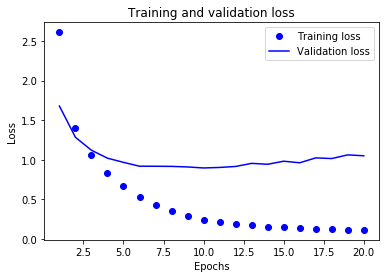

In [28]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
